## Dependencies

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Handling

In [47]:
dfMouseMetadata=pd.read_csv("Resources/Mouse_metadata.csv")   
dfStudyResult=pd.read_csv("Resources/Study_results.csv")

study_data = pd.merge(dfMouseMetadata, dfStudyResult, how="left", on="Mouse ID")
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Data Cleaning

In [48]:
study_data=study_data.rename(columns={
    "Mouse ID":"Mouse_ID",
    "Drug Regimen":"Drug_Regimen",
    "Age_months":"Age_Months",
    "Weight (g)":"Weight",
    "Tumor Volume (mm3)":"Tumor_Volume",
    "Metastatic Sites":"Metastatic_Sites"
})
study_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# checking the number of mice

len(study_data["Mouse_ID"].unique())

249

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dfDuplicatedMouseIDs=study_data.loc[study_data.duplicated(subset=['Mouse_ID', 'Timepoint']),'Mouse_ID'].unique()
dfDuplicatedMouseIDs

array(['g989'], dtype=object)

In [51]:
# Showing the belongs to duplicated mice ID

dfDuplicatedMouseID=study_data.loc[study_data["Mouse_ID"]=="g989"]
dfDuplicatedMouseID

,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# deleting the data belongs to duplicated mice id 

dfCleanedData=study_data[study_data["Mouse_ID"].isin(dfDuplicatedMouseIDs)==False]

len(dfCleanedData["Mouse_ID"].unique())

248

## Data Analysis

### 1. What is the average tumor volume change on mices after threatments, by drug regimens?

In [57]:
# listMouseID hold all mice ID unique uniquely.
listMouseID=dfCleanedData["Mouse_ID"].unique()

# For loop was processed in listMouseID to use listMouseID's index as a reference.
# Each index generates dfMousemouse and the data of Drug_Regimen,Gender, Age and Tumor_Volume are reached out.
listMouseDrugRegimen=[]
listMouseChangedTumorVolume=[]
listMouseGender=[]
listMouseAge=[]
for i in range(len(listMouseID)):
    dfMouse=dfCleanedData.loc[dfCleanedData["Mouse_ID"]==listMouseID[i]]
    dfMouse=dfMouse.reset_index(drop=True)
    
    drugRegimen=dfMouse["Drug_Regimen"][0]
    listMouseDrugRegimen.append(drugRegimen)
    
    genderMouse=dfMouse["Sex"][0]
    listMouseGender.append(genderMouse)
    
    ageMouse=dfMouse["Age_Months"][0]
    listMouseAge.append(ageMouse)
    
    
    lengthTimepoint=len(dfMouse["Timepoint"])-1
    changedTumorVolume=(dfMouse["Tumor_Volume"][0])-(dfMouse["Tumor_Volume"][lengthTimepoint])
    listMouseChangedTumorVolume.append(changedTumorVolume)
    
# dfThreatment was generated to show Tumor_Volume_Change by Mouse_ID
    
dfThreatment=pd.DataFrame({"Mouse_ID":listMouseID,
                            "Drug_Regimen":listMouseDrugRegimen,
                            "Gender":listMouseGender,
                            "Month_Age":listMouseAge,
                            "Tumor_Volume_Change":listMouseChangedTumorVolume})
dfThreatment=dfThreatment.sort_values(by="Tumor_Volume_Change",ascending=False)
dfThreatment


,Mouse_ID,Drug_Regimen,Gender,Month_Age,Tumor_Volume_Change
0,k403,Ramicane,Male,21,22.949874
1,s185,Capomulin,Female,3,21.656402
3,m601,Capomulin,Male,22,16.569036
2,x401,Capomulin,Female,16,16.515967
4,g791,Ramicane,Male,11,15.871528
...,...,...,...,...,...
196,t724,Naftisol,Female,2,-30.113288
141,m269,Stelasyn,Female,22,-30.123690
167,p189,Ketapril,Male,8,-30.294936
137,l725,Naftisol,Female,8,-31.668817


In [58]:
# Average Tumor_Volume_Change was calculated, by drug regimes.

dfAverageVolumeChange=dfThreatment.loc[:,["Drug_Regimen","Tumor_Volume_Change"]].groupby(["Drug_Regimen"]).mean()
dfAverageVolumeChange=dfAverageVolumeChange.reset_index()
dfAverageVolumeChange=dfAverageVolumeChange.sort_values(by="Tumor_Volume_Change",ascending=False)
dfAverageVolumeChange=dfAverageVolumeChange.reset_index(drop=True)
dfAverageVolumeChange=dfAverageVolumeChange.rename(columns={"Tumor_Volume_Change":"Ave_Tumor_Vol_Chg"})
dfAverageVolumeChange

,Drug_Regimen,Ave_Tumor_Vol_Chg
0,Ramicane,8.808610
1,Capomulin,8.332432
2,Propriva,-11.493884
3,Ceftamin,-12.753977
4,Infubinol,-13.178246
5,Zoniferol,-14.181258
6,Placebo,-15.508414
7,Stelasyn,-16.001707
8,Naftisol,-16.205757
9,Ketapril,-17.806191


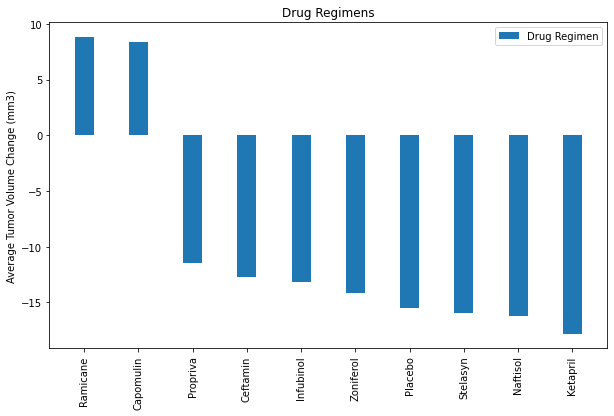

In [56]:
# average tumor volume change was visualized.

listDrug=dfAverageVolumeChange["Drug_Regimen"].tolist()
listAverageChange=dfAverageVolumeChange["Ave_Tumor_Vol_Chg"].tolist()

width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(listDrug, listAverageChange, width, label='Drug Regimen')

ax.set_ylabel('Average Tumor Volume Change (mm3)')
ax.set_title('Drug Regimens')
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [ ]:
# Average tumor volume change of mice taking Ramicane is 8.808610 mm3
# Average tumor volume change of mice taking Capomulin is 8.332432 mm3
# Ramicane may be used instead of Capomulin alternatively.

### 2. What is the number of threatment applied to male and female mices, by drug regimens?

In [67]:
listDrugRegimen = dfAverageVolumeChange["Drug_Regimen"].tolist()

listMaleThreatmentNumbers=[]
listFemaleThreatmentNumbers=[]
for regimen in listDrugRegimen:
    specificMaleRegimen=dfThreatment.loc[(dfThreatment["Drug_Regimen"]==regimen) & 
                                      (dfThreatment["Gender"]=="Male"),"Mouse_ID" ].count()
    listMaleThreatmentNumbers.append(specificMaleRegimen)
    
    specificFemaleRegimen=dfThreatment.loc[(dfThreatment["Drug_Regimen"]==regimen) & 
                                      (dfThreatment["Gender"]=="Female"),"Mouse_ID" ].count()
    listFemaleThreatmentNumbers.append(specificFemaleRegimen)
    

dfGenderDrugRegimen=pd.DataFrame({"Drug_Regimen":listDrugRegimen,
                                  "Applied_Threatment_Number_For_Male":listMaleThreatmentNumbers,
                                  "Applied_Threatment_Number_For_Female":listFemaleThreatmentNumbers})

dfGenderDrugRegimen["Total_Number_Threatment"]=dfGenderDrugRegimen["Applied_Threatment_Number_For_Male"]+dfGenderDrugRegimen["Applied_Threatment_Number_For_Female"]

dfGenderDrugRegimen

,Drug_Regimen,Applied_Threatment_Number_For_Male,Applied_Threatment_Number_For_Female,Total_Number_Threatment
0,Ramicane,16,9,25
1,Capomulin,12,13,25
2,Propriva,13,11,24
3,Ceftamin,12,13,25
4,Infubinol,13,12,25
5,Zoniferol,10,15,25
6,Placebo,12,13,25
7,Stelasyn,9,15,24
8,Naftisol,12,13,25
9,Ketapril,16,9,25


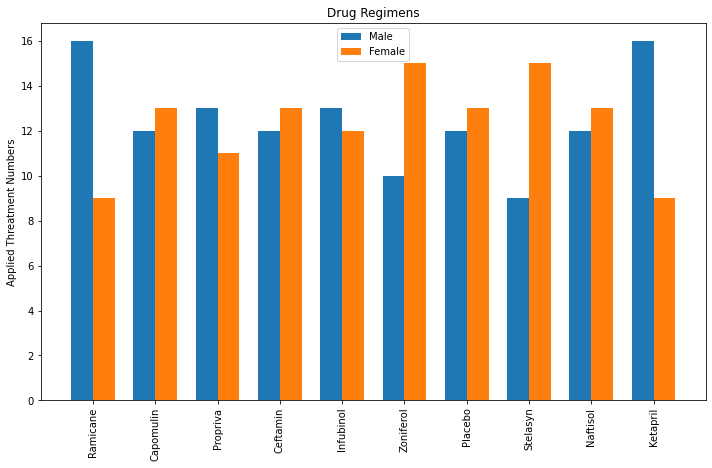

In [66]:
labels=listDrugRegimen
maleThreatmentNumbers=dfGenderDrugRegimen["Applied_Threatment_Number_For_Male"].tolist()
femaleThreatmentNumbers=dfGenderDrugRegimen["Applied_Threatment_Number_For_Female"].tolist()

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, maleThreatmentNumbers, width, label='Male')
rects2 = ax.bar(x + width/2, femaleThreatmentNumbers, width, label='Female')


ax.set_ylabel('Applied Threatment Numbers')
ax.set_title('Drug Regimens')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.xticks(rotation=90)
plt.show()